In [14]:
import thejoker as tj
import astropy.units as u
import jax.numpy as jnp

(-10.0, 200.0)

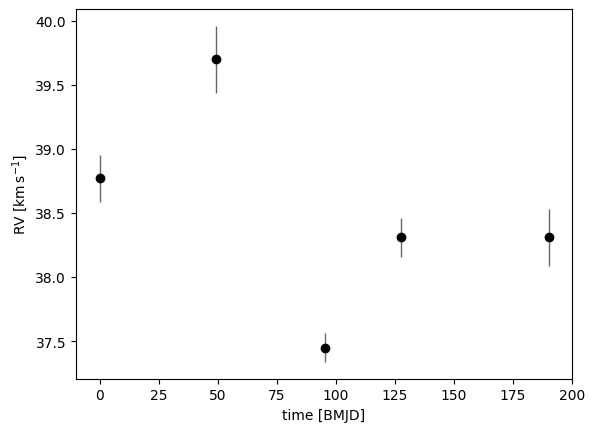

In [2]:
t = [0., 49.452, 95.393, 127.587, 190.408]
rv = [38.77, 39.70, 37.45, 38.31, 38.31] * u.km/u.s
err = [0.184, 0.261, 0.112, 0.155, 0.223] * u.km/u.s
data = tj.RVData(t=t, rv=rv, rv_err=err)
ax = data.plot()  
ax.set_xlim(-10, 200)  

In [3]:
import numpy as np
prior = tj.JokerPrior.default(
    P_min=2*u.day, P_max=256*u.day,
    sigma_K0=30*u.km/u.s,
    sigma_v=100*u.km/u.s
)

In [7]:
joker = tj.TheJoker(prior)
prior_samples = prior.sample(size=100_000)
samples = joker.rejection_sample(data, prior_samples)
samples.tbl

P,e,omega,M0,s,K,v0
d,,rad,rad,km / s,km / s,km / s
float64,float64,float64,float64,float64,float64,float64
2.241622462869278,0.0018101845917038123,1.339000174999511,2.561299723705905,0.0,1.6081799439020232,38.48117529022595
3.194424327858451,0.106297702070496,2.613574953394283,-1.8067268856122005,0.0,1.4406054058943887,38.89005095485096
130.45571808307912,0.22378552421471462,2.778872934342046,1.07955521792555,0.0,-1.6315118440187826,38.68657008002786
12.58825086977535,0.6379863069099363,2.3371325707308572,-1.9505090274174217,0.0,-2.368996766858794,38.67553940106395
63.24854180666426,0.7044257786276339,-3.1110099141839154,1.8946161910771928,0.0,16.181628487954104,34.710859397600146
63.53409560921692,0.7973823410951388,1.6651630212374466,-2.161909065692663,0.0,-1.608936242025463,38.301385578936
59.827857144764195,0.5586918060563335,1.784621914810138,-1.600815930643337,0.0,-1.0603793064738538,38.37348217419583
63.723504877030464,0.019278952730242747,-1.868632935068993,3.0826799087832684,0.0,2.2974355201662533,37.95168934983204


In [15]:
jnp.array(samples['P'])


Array([  2.2416224,   3.1944244, 130.45572  ,  12.588251 ,  63.248543 ,
        63.534096 ,  59.827858 ,  63.723503 ,  18.115013 ,  62.018692 ,
        62.45239  ,  62.20935  ,  61.99535  ,   8.457294 ], dtype=float32)